# 📖 Lendo o arquivo csv

In [133]:
!pip install pywaffle

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7a/94/a1615bac6706eb8a58fe08675b80a11b5463ef9591176dd3e57257495774/matplotlib-3.8.0-cp310-cp310-win_amd64.whl.metadata
  Using cached matplotlib-3.8.0-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.0-cp310-cp310-win_amd64.whl (7.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\gabri\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\ft2font.cp310-win_amd64.pyd'
Check the permissions.



In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown
from pywaffle import Waffle 

In [136]:
cancer_df = pd.read_csv('cancer_data_eng.csv', encoding='ISO-8859-1')
cancer_df

# 🧼 Limpeza dos dados 
- Filtrar colunas que irei utilizar
- Filtrando a coluna de tipos de cancer para somente os cancers de pele

In [ ]:
cancer_df = cancer_df[['Gender', 'Raca.Color', 'Degree.of.Education', 'Name.Occupation', 'Description.of.Topography']]
cancer_df.columns = ['Genero', 'Cor_Raca', 'Grau_Educacao', 'Nome_Ocupacao', 'Descricao_Topografia']
cancer_df

,Genero,Cor_Raca,Grau_Educacao,Nome_Ocupacao,Descricao_Topografia
0,MASCULINO,BRANCO,NaN,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,"RETO, SOE"
1,FEMININO,NaN,NaN,SEM INFORMAÇÃO\t,COLON DESCENDENTE
2,FEMININO,PARDA,NaN,SEM INFORMAÇÃO\t,"MAMA , SOE"
3,FEMININO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DO MEMBRO SUPERIOR E DO OMBRO
4,MASCULINO,BRANCO,NaN,SEM INFORMAÇÃO\t,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE"
...,...,...,...,...,...
1778171,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
1778172,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
1778173,MASCULINO,PARDA,NaN,SEM INFORMAÇÃO\t,"RETO, SOE"
1778174,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,"PULMAO, SOE"


In [ ]:
cancer_df = cancer_df[cancer_df['Descricao_Topografia'].str.contains('pele', case=False)].reset_index(drop=True)
cancer_df

,Genero,Cor_Raca,Grau_Educacao,Nome_Ocupacao,Descricao_Topografia
0,FEMININO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DO MEMBRO SUPERIOR E DO OMBRO
1,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DO MEMBRO INFERIOR E DO QUADRIL
2,FEMININO,BRANCO,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
3,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
4,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
...,...,...,...,...,...
370321,FEMININO,BRANCO,NaN,SEM INFORMAÇÃO\t,PELE DO TRONCO
370322,MASCULINO,BRANCO,NaN,SEM INFORMAÇÃO\t,"PELE DO LABIO, SOE"
370323,FEMININO,BRANCO,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
370324,MASCULINO,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE


In [ ]:
# Substituir NaN e 'Sem informação\t' por 0 em todo o DataFrame
cancer_df['Nome_Ocupacao'] = cancer_df['Nome_Ocupacao'].str.replace('\t', '', regex=True)
cancer_df.replace({pd.NA: 0, 'SEM INFORMAÇÃO': 0}, inplace=True)
cancer_df

,Genero,Cor_Raca,Grau_Educacao,Nome_Ocupacao,Descricao_Topografia
0,FEMININO,0,0,0,PELE DO MEMBRO SUPERIOR E DO OMBRO
1,MASCULINO,0,0,0,PELE DO MEMBRO INFERIOR E DO QUADRIL
2,FEMININO,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
3,MASCULINO,0,0,0,PELE DE OUTRAS PARTES DA FACE
4,MASCULINO,0,0,0,PELE DE OUTRAS PARTES DA FACE
...,...,...,...,...,...
370321,FEMININO,BRANCO,0,0,PELE DO TRONCO
370322,MASCULINO,BRANCO,0,0,"PELE DO LABIO, SOE"
370323,FEMININO,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
370324,MASCULINO,0,0,0,PELE DE OUTRAS PARTES DA FACE


# 🔍 Análise exploratória

In [ ]:
#Verificando os tipos de dados das colunas
cancer_df.dtypes 

Genero                  object
Cor_Raca                object
Grau_Educacao           object
Nome_Ocupacao           object
Descricao_Topografia    object
dtype: object

In [ ]:
#Verificando quantas respostas possuem 
nRow, nCol = cancer_df.shape

display(Markdown(f"### O dataframe filtrado que iremos analisar possui **{nRow}** linhas e **{nCol}** colunas."))

### O dataframe filtrado que iremos analisar possui **370326** linhas e **5** colunas.

In [ ]:
# Funcao para definir se há dados nulos nas colunas
def dados_nulos(contagem_zeros):
  if contagem_zeros > 0:
    display(Markdown(f"### {contagem_zeros} pessoas deixaram em branco. Como há quantidade significativa de dados nulos, será feita a exclusão deles para que possamos ter uma melhor visualização."))
  else:
    display(Markdown("### Como não há respostas nulas, continuaremos sem alteração nos dados."))

## 🩺 Tipos de Câncers de Pele

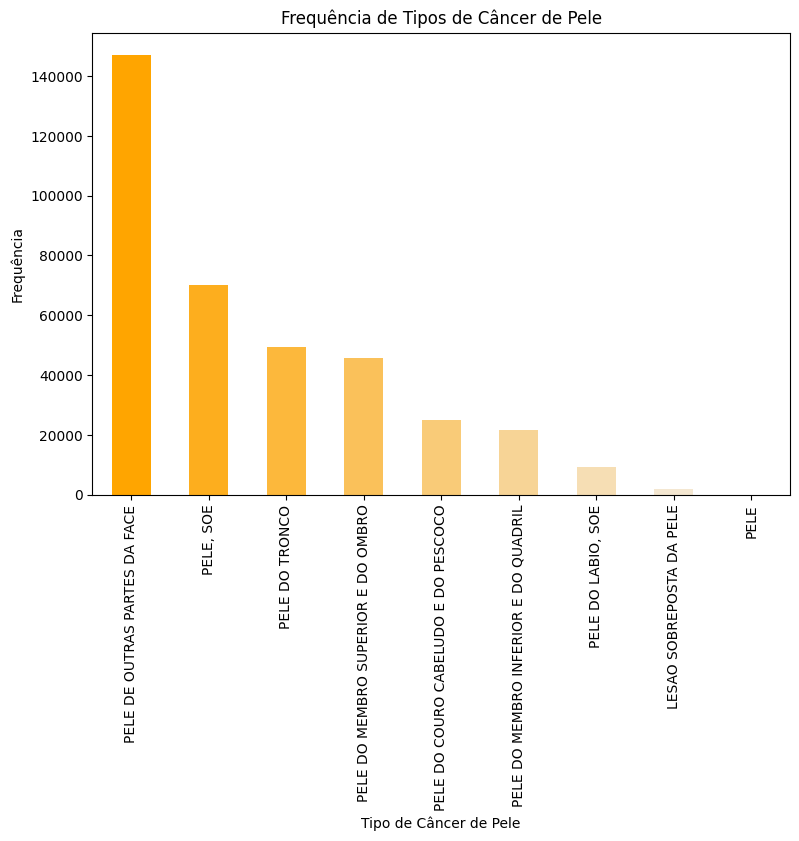

In [ ]:
# Contar a frequência de cada tipo de câncer de pele
contagem_tipos = cancer_df['Descricao_Topografia'].value_counts()

# Criar uma paleta de cores com a cor base "orange" e intensidade proporcional à contagem dos tipos de cancers de pele 
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(contagem_tipos))

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
contagem_tipos.plot(kind='bar', color=cores_alaranjadas)

# Adicionar rótulos e título
plt.title('Frequência de Tipos de Câncer de Pele')
plt.xlabel('Tipo de Câncer de Pele')
plt.ylabel('Frequência')
plt.show()

### Os tipos de **câncer de pele mais frequentes** são:
1. Pele de outras partes da face;
2. Pele, SOE (Tipo específico de câncer de pele não foi identificado ou não está sendo especificado);
3. Pele do tronco.

## 👤 Gênero

In [ ]:
# Quantificando as respostas nulas na coluna 'Genero'
contagem_zeros = (cancer_df['Genero'] == 0).sum()
dados_nulos(contagem_zeros)

### Como não há respostas nulas, continuaremos sem alteração nos dados.

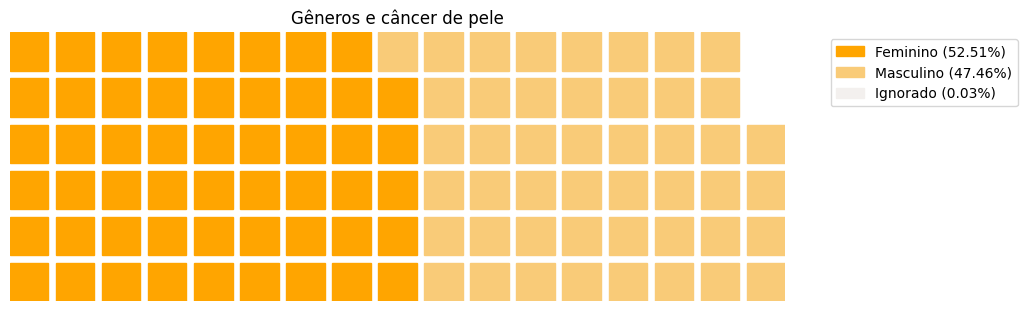

In [ ]:
# Quantificando as respostas na coluna 'Genero'
# Calculando a porcentagem de cada gênero no dataframe
porcentagens_genero = (round(cancer_df['Genero'].value_counts(normalize=True) * 100, 2)).to_dict()

# Renomeando as chaves do dicionário conforme o formato desejado
porcentagens_formatadas = {
    'Feminino': porcentagens_genero['FEMININO'],
    'Masculino': porcentagens_genero['MASCULINO'],
    'Ignorado': porcentagens_genero['IGNORADO']
}
    

# Criar uma paleta de cores com a cor base "orange" e intensidade proporcional à contagem dos tipos de generos
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(porcentagens_formatadas))

fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(10, 5),  # Ajuste o tamanho conforme necessário
    rows=6,  # Ajuste o número de linhas conforme necessário
    values=porcentagens_formatadas,
    title={'label': 'Gêneros e câncer de pele', 'loc': 'center'},
    labels=[f"{k} ({v}%)" for k, v in porcentagens_formatadas.items()],
    colors=cores_alaranjadas,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
fig.set_tight_layout(False)
plt.show()

### Podemos perceber que de **370326** indivíduos:
- **52.5%** são do sexo feminino.
- **47.5%** são do sexo masculino. 

### Ou seja, a **maioria do público** que possui algum tipo de câncer de pele são mulheres.

## 🌈 Cor de pele

In [ ]:
# Quantificando as respostas nulas na coluna 'Cor_Raca'
contagem_zeros = (cancer_df['Cor_Raca'] == 0).sum()
dados_nulos(contagem_zeros)

### 209103 pessoas deixaram em branco. Como há quantidade significativa de dados nulos, será feita a exclusão deles para que possamos ter uma melhor visualização.

In [ ]:
# Excluir todas as linhas da coluna 'Cor_Raça' contém o valor 0
cancer_cor_df = cancer_df[cancer_df['Cor_Raca'] != 0]
cancer_cor_df

,Genero,Cor_Raca,Grau_Educacao,Nome_Ocupacao,Descricao_Topografia
2,FEMININO,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
5,MASCULINO,BRANCO,0,0,PELE DO COURO CABELUDO E DO PESCOCO
8,MASCULINO,BRANCO,0,SUPERVISORES DA EXTRAÇÃO MINERAL E DA CONSTRUÇ...,PELE DE OUTRAS PARTES DA FACE
10,FEMININO,BRANCO,0,0,PELE DO MEMBRO INFERIOR E DO QUADRIL
11,MASCULINO,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
...,...,...,...,...,...
370319,MASCULINO,BRANCO,0,0,"PELE DO LABIO, SOE"
370320,FEMININO,BRANCO,0,0,PELE DO TRONCO
370321,FEMININO,BRANCO,0,0,PELE DO TRONCO
370322,MASCULINO,BRANCO,0,0,"PELE DO LABIO, SOE"


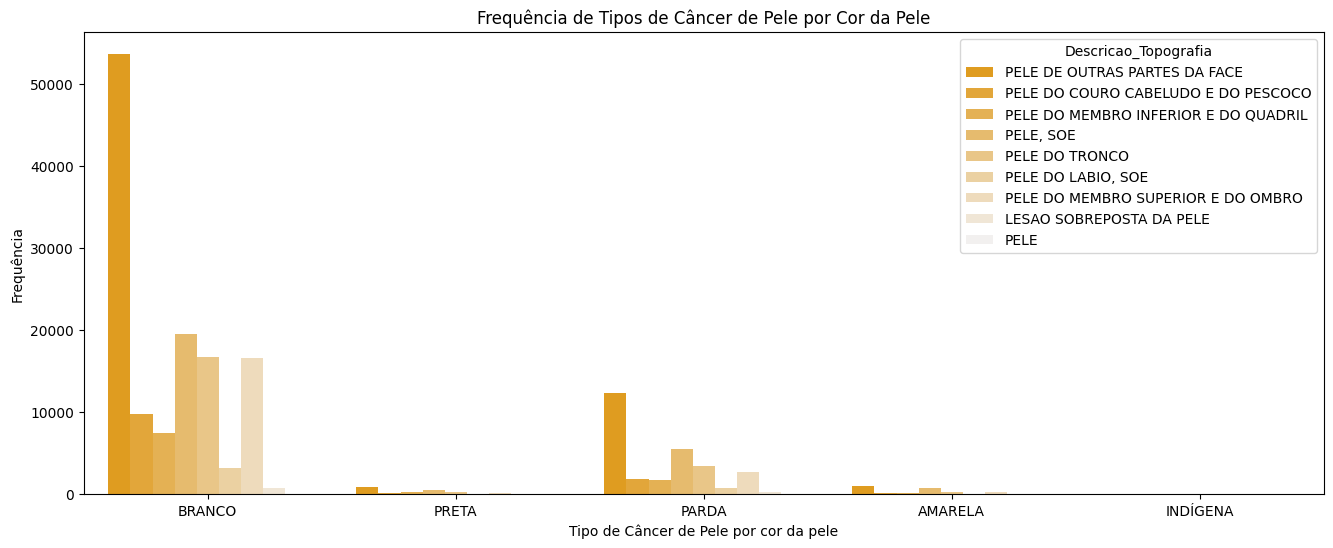

In [ ]:
# Criar uma paleta de cores com a cor base "orange" e intensidade proporcional à contagem dos tipos de cancers de pele 
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(contagem_tipos))

# Criar o gráfico de barras agrupado
plt.figure(figsize=(16, 6))
sns.countplot(data=cancer_cor_df, x='Cor_Raca', hue='Descricao_Topografia', palette=cores_alaranjadas)

# Adicionar rótulos e título
plt.title('Frequência de Tipos de Câncer de Pele por Cor da Pele')
plt.xlabel('Tipo de Câncer de Pele por cor da pele')
plt.ylabel('Frequência')
plt.show()

### Assim, é notório que o câncer de pele afeta mais as **pessoas consideradas brancas e pardas**, sendo o câncer de pele de outras partes da face e o sem especificação os mais aparentes.

## ✍🏻 Grau de Educação

In [ ]:
# Quantificando as respostas nulas na coluna 'Grau_Educacao'
contagem_zeros = (cancer_df['Grau_Educacao'] == 0).sum()
dados_nulos(contagem_zeros)

### 310344 pessoas deixaram em branco. Como há quantidade significativa de dados nulos, será feita a exclusão deles para que possamos ter uma melhor visualização.

In [ ]:
# Excluir todas as linhas em que a coluna 'Grau_Educação' contém o valor 0
cancer_escolaridade_df = cancer_df[cancer_df['Grau_Educacao'] != 0]
cancer_escolaridade_df

,Genero,Cor_Raca,Grau_Educacao,Nome_Ocupacao,Descricao_Topografia
25,FEMININO,BRANCO,FUNDAMENTAL I (1ª A 4ª SÉRIE),0,PELE DO MEMBRO INFERIOR E DO QUADRIL
28,MASCULINO,BRANCO,FUNDAMENTAL I (1ª A 4ª SÉRIE),TRABALHADORES DA CONSTRUÇÃO CIVIL E OBRAS PÚBL...,PELE DE OUTRAS PARTES DA FACE
51,MASCULINO,BRANCO,SUPERIOR COMPLETO,"ENGENHEIROS, ARQUITETOS E AFINS","PELE, SOE"
53,FEMININO,BRANCO,FUNDAMENTAL II (5ª A 8ª SÉRIE),0,PELE DO TRONCO
94,FEMININO,BRANCO,FUNDAMENTAL I (1ª A 4ª SÉRIE),"VENDEDORES A DOMICÍLIO, AMBULANTES E EM BANCAS",PELE DO MEMBRO SUPERIOR E DO OMBRO
...,...,...,...,...,...
363889,MASCULINO,0,SEM ESCOLARIDADE,0,PELE DO MEMBRO SUPERIOR E DO OMBRO
363890,MASCULINO,0,SEM ESCOLARIDADE,0,"PELE, SOE"
363892,MASCULINO,0,SUPERIOR COMPLETO,0,PELE DO MEMBRO SUPERIOR E DO OMBRO
363893,MASCULINO,0,SUPERIOR COMPLETO,0,PELE DO COURO CABELUDO E DO PESCOCO


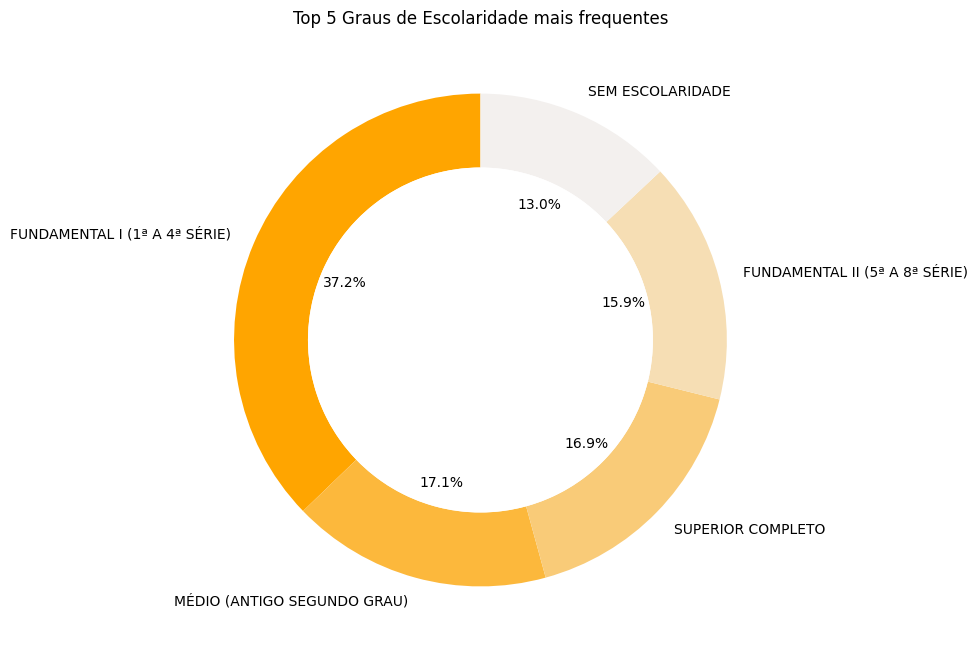

In [ ]:
# Quantificando as respostas da coluna 'Grau_Educacao'
contagem_grau = cancer_escolaridade_df['Grau_Educacao'].value_counts()

# 5 valores mais frequentes na coluna
top_5_valores = contagem_grau.head(5)

# Criar uma paleta de cores com a cor base "orange" e intensidade proporcional à contagem dos graus de educação
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(top_5_valores))

# Criar o gráfico de rosca
plt.figure(figsize=(8, 8))
plt.pie(top_5_valores, labels=top_5_valores.index, autopct='%1.1f%%', colors=cores_alaranjadas, startangle=90, wedgeprops=dict(width=0.3))

# Adicionar círculo no meio para criar o efeito de rosca
centro_circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Adicionar rótulos e título
plt.title('Top 5 Graus de Escolaridade mais frequentes')
plt.show()


### Percebemos com esse gráfico que os indivíduos com câncer de pele é mais frequente terem estudado **até o Ensino Fundamental I (1ª a 4ª série)** e posteriormente há maior incidência aqueles que estudaram **até o Ensino Médio (Antigo Segundo Grau)**.

## 🪪 Nome da Ocupação

In [ ]:
# Quantificando as respostas nulas na coluna 'Nome_Ocupacao' 
contagem_zeros = (cancer_df['Nome_Ocupacao'] == 0).sum()
dados_nulos(contagem_zeros)

### 327330 pessoas deixaram em branco. Como há quantidade significativa de dados nulos, será feita a exclusão deles para que possamos ter uma melhor visualização.

In [ ]:
# Excluir todas as linhas da coluna 'Nome_Ocupacao' contém o valor 0
cancer_ocupacao_df = cancer_df[cancer_df['Nome_Ocupacao'] != 0]
cancer_ocupacao_df

,Genero,Cor_Raca,Grau_Educacao,Nome_Ocupacao,Descricao_Topografia
8,MASCULINO,BRANCO,0,SUPERVISORES DA EXTRAÇÃO MINERAL E DA CONSTRUÇ...,PELE DE OUTRAS PARTES DA FACE
14,MASCULINO,BRANCO,0,GERENTES DE PRODUÇÃO E OPERAÇÕES,"PELE, SOE"
28,MASCULINO,BRANCO,FUNDAMENTAL I (1ª A 4ª SÉRIE),TRABALHADORES DA CONSTRUÇÃO CIVIL E OBRAS PÚBL...,PELE DE OUTRAS PARTES DA FACE
44,MASCULINO,BRANCO,0,CONDUTORES DE VEÍCULOS E OPERADORES DE EQUIPAM...,PELE DO COURO CABELUDO E DO PESCOCO
45,MASCULINO,BRANCO,0,TRABALHADORES DA CONSTRUÇÃO CIVIL E OBRAS PÚBL...,"PELE DO LABIO, SOE"
...,...,...,...,...,...
363869,MASCULINO,BRANCO,0,DIRETORES E GERENTES EM EMPRESA DE SERVIÇOS DE...,PELE DE OUTRAS PARTES DA FACE
363874,MASCULINO,BRANCO,SUPERIOR COMPLETO,PROFISSIONAIS DA BIOTECNOLOGIA E METROLOGIA,PELE DE OUTRAS PARTES DA FACE
363875,MASCULINO,BRANCO,SUPERIOR COMPLETO,PROFISSIONAIS DA BIOTECNOLOGIA E METROLOGIA,PELE DO MEMBRO INFERIOR E DO QUADRIL
363878,MASCULINO,BRANCO,FUNDAMENTAL II (5ª A 8ª SÉRIE),OPERADORES NA PREPARAÇÃO DE FUMO E NA FABRICAÇ...,PELE DE OUTRAS PARTES DA FACE


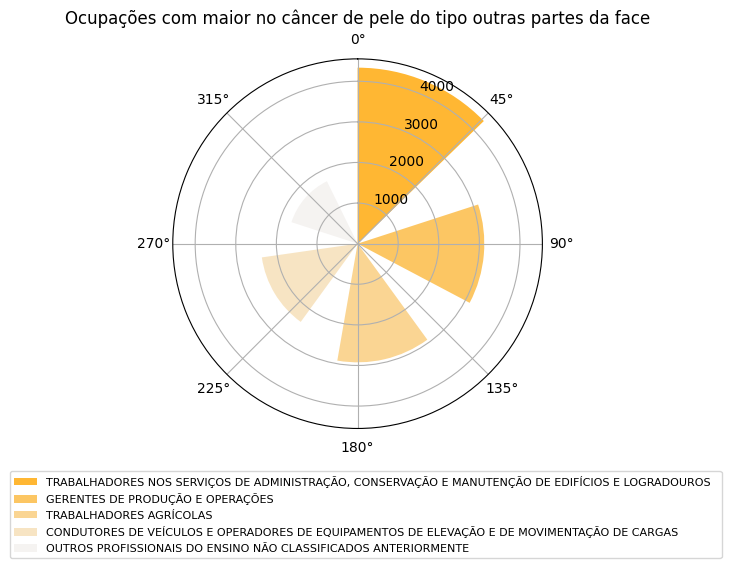

In [ ]:
# Quantificando as respostas da coluna 'Nome_Ocupacao'
contagem_ocupacao = cancer_ocupacao_df['Nome_Ocupacao'].value_counts()

# 5 valores mais frequentes na coluna 'Nome_Ocupacao'
top_ocupacoes = contagem_ocupacao.head(5)
titulos_ocupacao = top_ocupacoes.index.tolist()
valores_ocupacao = top_ocupacoes.values

valores_topografia = contagem_tipos.head()

# Definindo ângulos para o Rose Chart
num_categorias = len(titulos_ocupacao)
theta = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False)

cores_alaranjadas = sns.light_palette("Orange", n_colors=num_categorias, reverse=True)

# Desenhando o gráfico Rose Chart
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
bars = ax.bar(theta, valores_ocupacao, align='edge', alpha=0.8, color=cores_alaranjadas)

# Configurações do gráfico
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Adicionar legenda
ax.legend(bars, titulos_ocupacao, loc='upper right', bbox_to_anchor=(1.5, -0.1), ncol=1, fontsize=8)

plt.title("Ocupações com maior incidência no câncer de pele do tipo outras partes da face")
plt.show()


### Dessa forma percebemos que, **trabalhadores nos serviços de administração, conservação e manutenção de edifícios e logradouros** possuem maior incidência no câncer de pele tipo outras partes da face.